No. of samples loaded: 10000


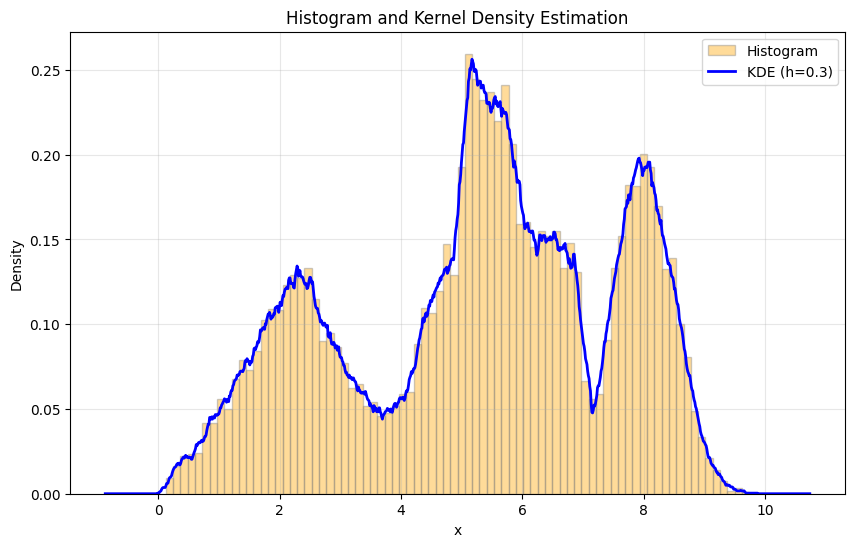

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 26 10:39:21 2025

@author: sysadm
"""

import numpy as np
import matplotlib.pyplot as plt

# *****************************************
# Load samples
# *****************************************
samples = np.loadtxt("samples.csv", delimiter=",") 
print(f"No. of samples loaded: {len(samples)}")


'''(csv=Comma-Separated Values),
np.loadtxt() → is a NumPy function used to load data from a text file — in this case, a CSV file
It opens the file "samples.csv".
Reads its content line by line.
Splits each line by commas (because of delimiter=",").
Converts the values into a NumPy array (usually of type float).
So after this line executes,
✅ samples becomes a NumPy array containing the numerical data from the CSV file.'''



# *****************************************
# Histogram
# *****************************************
plt.figure(figsize=(10,6))
plt.hist(samples, bins=80, density=True, alpha=0.4, color="orange", edgecolor="gray", label="Histogram")

'''density=true ->it normalizes the histogram so that the area under the curve = 1.
alpha=0.4->Transparency of bars (40%)
color="orange"
col="orange-> Bar color
edgecolor="gray"-> Border color of bars'''

# **********************************************************************************
# Kernel Density Estimation - IMPLEMENT THIS FUNCTION 
# **********************************************************************************
#ktype='gaussian' or 'uniform'

def kde(x_points, data, bandwidth,ktype='gaussian'):
    density=[]
    if ktype=='gaussian':
        for x in x_points:
            u=((x-data)/bandwidth)
            kernel=(np.exp(-(1/2)*(u**2)))/(np.sqrt(2*np.pi))
            no_of_points_k=np.sum(kernel)
            density_1=no_of_points_k/(len(data)*bandwidth)
            density.append(density_1)
        return density
    
    elif ktype=='uniform':
        for x in x_points:
            u=(x-data)
            kernel = np.where(np.abs(u) <= (bandwidth/2), 1, 0)
            k=np.sum(kernel)
            density_2=k/(len(data)*bandwidth)
            density.append(density_2)
        return density



# **********************************************************************************

# Bandwidth value
h =0.3
# points at which you will measure the density
x_grid = np.linspace(min(samples) - 1, max(samples) + 1, 1000)
ktype =  'uniform'# or 'gaussian'
kde_values = kde(x_grid, samples, h, ktype)

#Plot KDE (UNCOMMENT THE LINE BELOW ONCE YOU HAVE IMPLEMENTED THE FUNCTION)
plt.plot(x_grid, kde_values, color="blue", linewidth=2, label=f"KDE (h={h})")

# *****************************************
# Formatting
# *****************************************
plt.title("Histogram and Kernel Density Estimation")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.legend()
plt.show()